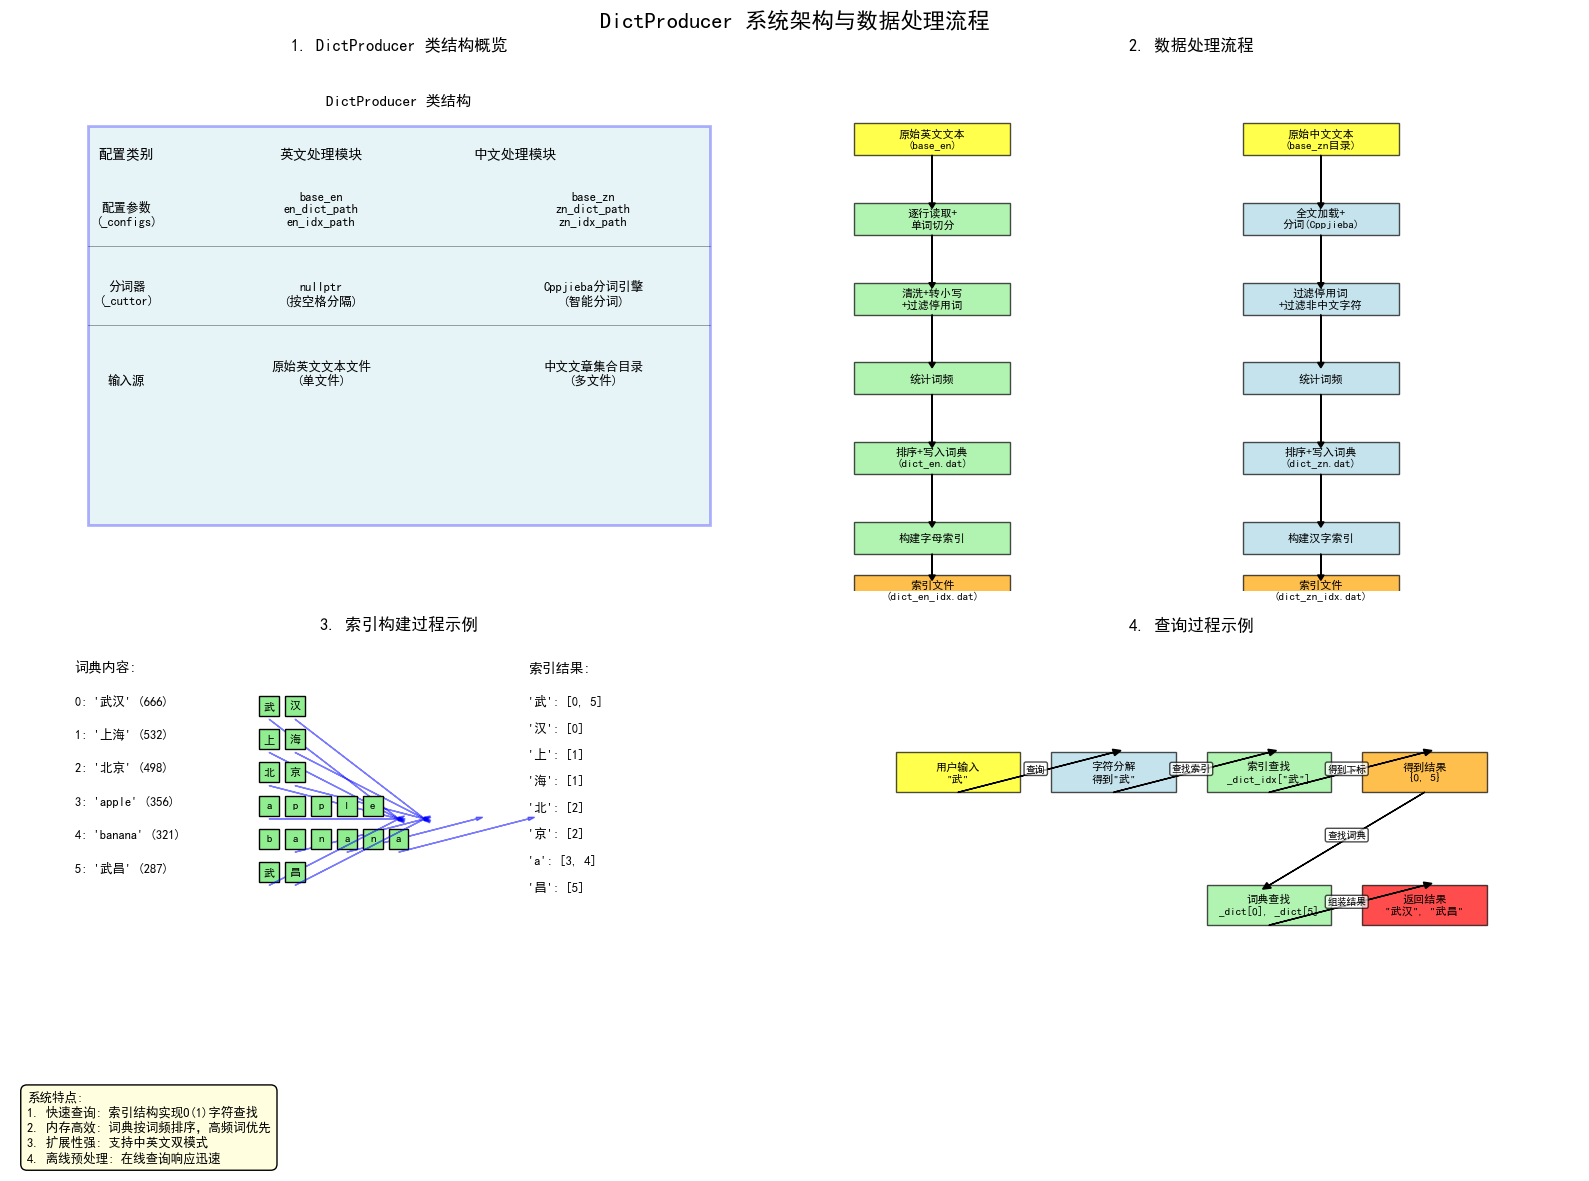

图表已保存为 'dictproducer_architecture.png'
图表已保存为 'dictproducer_architecture.svg'


In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch
import numpy as np
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 选择SimHei作为默认的中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# 创建图表
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('DictProducer 系统架构与数据处理流程', fontsize=16, fontweight='bold')

# 1. 系统总体架构图
ax1 = axes[0, 0]
ax1.set_title('1. DictProducer 类结构概览', fontsize=12, fontweight='bold')
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 8)
ax1.axis('off')

# 绘制主框
main_box = patches.Rectangle((1, 1), 8, 6, linewidth=2, 
                           edgecolor='blue', facecolor='lightblue', alpha=0.3)
ax1.add_patch(main_box)
ax1.text(5, 7.3, 'DictProducer 类结构', ha='center', fontsize=11, fontweight='bold')

# 绘制表格
headers = ['配置类别', '英文处理模块', '中文处理模块']
header_y = 6.5
for i, header in enumerate(headers):
    ax1.text(1.5 + i*2.5, header_y, header, ha='center', fontweight='bold', fontsize=10)

# 配置参数行
config_data = [
    ['配置参数\n(_configs)', 'base_en\nen_dict_path\nen_idx_path', 
     'base_zn\nzn_dict_path\nzn_idx_path']
]
# 分词器行
cuttor_data = [
    ['分词器\n(_cuttor)', 'nullptr\n(按空格分隔)', 'Cppjieba分词引擎\n(智能分词)']
]
# 输入源行
input_data = [
    ['输入源', '原始英文文本文件\n(单文件)', '中文文章集合目录\n(多文件)']
]

# 绘制行
for i, (label, en, zn) in enumerate(config_data):
    y = 5.5
    ax1.text(1.5, y, label, ha='center', fontsize=9)
    ax1.text(4, y, en, ha='center', fontsize=9)
    ax1.text(7.5, y, zn, ha='center', fontsize=9)
    
    # 添加分隔线
    ax1.plot([1, 9], [5.2, 5.2], 'k-', linewidth=0.5, alpha=0.5)

for i, (label, en, zn) in enumerate(cuttor_data):
    y = 4.3
    ax1.text(1.5, y, label, ha='center', fontsize=9)
    ax1.text(4, y, en, ha='center', fontsize=9)
    ax1.text(7.5, y, zn, ha='center', fontsize=9)
    
    ax1.plot([1, 9], [4.0, 4.0], 'k-', linewidth=0.5, alpha=0.5)

for i, (label, en, zn) in enumerate(input_data):
    y = 3.1
    ax1.text(1.5, y, label, ha='center', fontsize=9)
    ax1.text(4, y, en, ha='center', fontsize=9)
    ax1.text(7.5, y, zn, ha='center', fontsize=9)

# 2. 数据处理流程图
ax2 = axes[0, 1]
ax2.set_title('2. 数据处理流程', fontsize=12, fontweight='bold')
ax2.set_xlim(0, 12)
ax2.set_ylim(0, 10)
ax2.axis('off')

# 创建流程图
flow_nodes = {
    'start_en': (2, 8.5, '原始英文文本\n(base_en)', 'yellow'),
    'process_en1': (2, 7, '逐行读取+\n单词切分', 'lightgreen'),
    'process_en2': (2, 5.5, '清洗+转小写\n+过滤停用词', 'lightgreen'),
    'process_en3': (2, 4, '统计词频', 'lightgreen'),
    'process_en4': (2, 2.5, '排序+写入词典\n(dict_en.dat)', 'lightgreen'),
    'process_en5': (2, 1, '构建字母索引', 'lightgreen'),
    'end_en': (2, 0, '索引文件\n(dict_en_idx.dat)', 'orange'),
    
    'start_zn': (8, 8.5, '原始中文文本\n(base_zn目录)', 'yellow'),
    'process_zn1': (8, 7, '全文加载+\n分词(Cppjieba)', 'lightblue'),
    'process_zn2': (8, 5.5, '过滤停用词\n+过滤非中文字符', 'lightblue'),
    'process_zn3': (8, 4, '统计词频', 'lightblue'),
    'process_zn4': (8, 2.5, '排序+写入词典\n(dict_zn.dat)', 'lightblue'),
    'process_zn5': (8, 1, '构建汉字索引', 'lightblue'),
    'end_zn': (8, 0, '索引文件\n(dict_zn_idx.dat)', 'orange'),
}

# 绘制节点
for node, (x, y, label, color) in flow_nodes.items():
    box = patches.Rectangle((x-1.2, y-0.3), 2.4, 0.6, 
                          facecolor=color, edgecolor='black', alpha=0.7)
    ax2.add_patch(box)
    ax2.text(x, y, label, ha='center', va='center', fontsize=8)

# 绘制连接线
connections = [
    ('start_en', 'process_en1'),
    ('process_en1', 'process_en2'),
    ('process_en2', 'process_en3'),
    ('process_en3', 'process_en4'),
    ('process_en4', 'process_en5'),
    ('process_en5', 'end_en'),
    
    ('start_zn', 'process_zn1'),
    ('process_zn1', 'process_zn2'),
    ('process_zn2', 'process_zn3'),
    ('process_zn3', 'process_zn4'),
    ('process_zn4', 'process_zn5'),
    ('process_zn5', 'end_zn'),
]

for start, end in connections:
    x1, y1, _ = flow_nodes[start][:3]
    x2, y2, _ = flow_nodes[end][:3]
    ax2.arrow(x1, y1-0.3, 0, y2-y1+0.6, 
             head_width=0.1, head_length=0.1, fc='black', ec='black')

# 3. 索引构建示例图
ax3 = axes[1, 0]
ax3.set_title('3. 索引构建过程示例', fontsize=12, fontweight='bold')
ax3.set_xlim(0, 12)
ax3.set_ylim(0, 8)
ax3.axis('off')

# 词典内容
dictionary = {
    0: ('武汉', 666),
    1: ('上海', 532),
    2: ('北京', 498),
    3: ('apple', 356),
    4: ('banana', 321),
    5: ('武昌', 287)
}

# 绘制词典
ax3.text(1, 7.5, '词典内容:', fontweight='bold', fontsize=10)
for idx, (word, freq) in dictionary.items():
    ax3.text(1, 7 - idx*0.5, f"{idx}: '{word}' ({freq})", fontsize=9)
    # 绘制字符拆分
    for i, char in enumerate(word):
        x = 4 + i*0.4
        y = 7 - idx*0.5
        ax3.add_patch(patches.Rectangle((x-0.15, y-0.15), 0.3, 0.3, 
                                      facecolor='lightgreen', edgecolor='black'))
        ax3.text(x, y, char, ha='center', va='center', fontsize=8)
        # 连接线到索引
        if char in ['武', '汉', '上', '海', '北', '京', 'a', '昌']:
            ax3.arrow(x, y-0.2, 2, -1.5 + idx*0.5, 
                     head_width=0.05, head_length=0.1, fc='blue', ec='blue', alpha=0.5)

# 绘制索引结果
ax3.text(8, 7.5, '索引结果:', fontweight='bold', fontsize=10)
index_results = {
    '武': [0, 5],
    '汉': [0],
    '上': [1],
    '海': [1],
    '北': [2],
    '京': [2],
    'a': [3, 4],
    '昌': [5]
}

y_pos = 7
for char, indices in index_results.items():
    ax3.text(8, y_pos, f"'{char}': {indices}", fontsize=9)
    y_pos -= 0.4

# 4. 查询过程图
ax4 = axes[1, 1]
ax4.set_title('4. 查询过程示例', fontsize=12, fontweight='bold')
ax4.set_xlim(0, 10)
ax4.set_ylim(0, 8)
ax4.axis('off')

# 绘制查询流程
steps = [
    (2, 6, '用户输入\n"武"', 'yellow'),
    (4, 6, '字符分解\n得到"武"', 'lightblue'),
    (6, 6, '索引查找\n_dict_idx["武"]', 'lightgreen'),
    (8, 6, '得到结果\n{0, 5}', 'orange'),
    (6, 4, '词典查找\n_dict[0], _dict[5]', 'lightgreen'),
    (8, 4, '返回结果\n"武汉", "武昌"', 'red')
]

# 绘制步骤框
for x, y, label, color in steps:
    box = patches.Rectangle((x-0.8, y-0.3), 1.6, 0.6, 
                          facecolor=color, edgecolor='black', alpha=0.7)
    ax4.add_patch(box)
    ax4.text(x, y, label, ha='center', va='center', fontsize=8)

# 绘制连接箭头
arrows = [
    ((2, 5.7), (4, 6.3), '查询'),
    ((4, 5.7), (6, 6.3), '查找索引'),
    ((6, 5.7), (8, 6.3), '得到下标'),
    ((8, 5.7), (6, 4.3), '查找词典'),
    ((6, 3.7), (8, 4.3), '组装结果')
]

for (x1, y1), (x2, y2), label in arrows:
    ax4.arrow(x1, y1, x2-x1, y2-y1, 
             head_width=0.1, head_length=0.1, fc='black', ec='black')
    ax4.text((x1+x2)/2, (y1+y2)/2, label, ha='center', fontsize=7, 
            bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.7))

# 添加流程图说明
fig.text(0.02, 0.02, 
         '系统特点:\n'
         '1. 快速查询: 索引结构实现O(1)字符查找\n'
         '2. 内存高效: 词典按词频排序，高频词优先\n'
         '3. 扩展性强: 支持中英文双模式\n'
         '4. 离线预处理: 在线查询响应迅速',
         fontsize=9, bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow"))

plt.tight_layout()
plt.savefig('dictproducer_architecture.png', dpi=300, bbox_inches='tight')
plt.show()

print("图表已保存为 'dictproducer_architecture.png'")
print("图表已保存为 'dictproducer_architecture.svg'")

R:\TEMP\ipykernel_3368\2038375975.py:151: UserWarning: Glyph 8226 (\N{BULLET}) missing from font(s) SimHei.
  plt.savefig('pagelib_module_relationship.png', dpi=300, bbox_inches='tight')


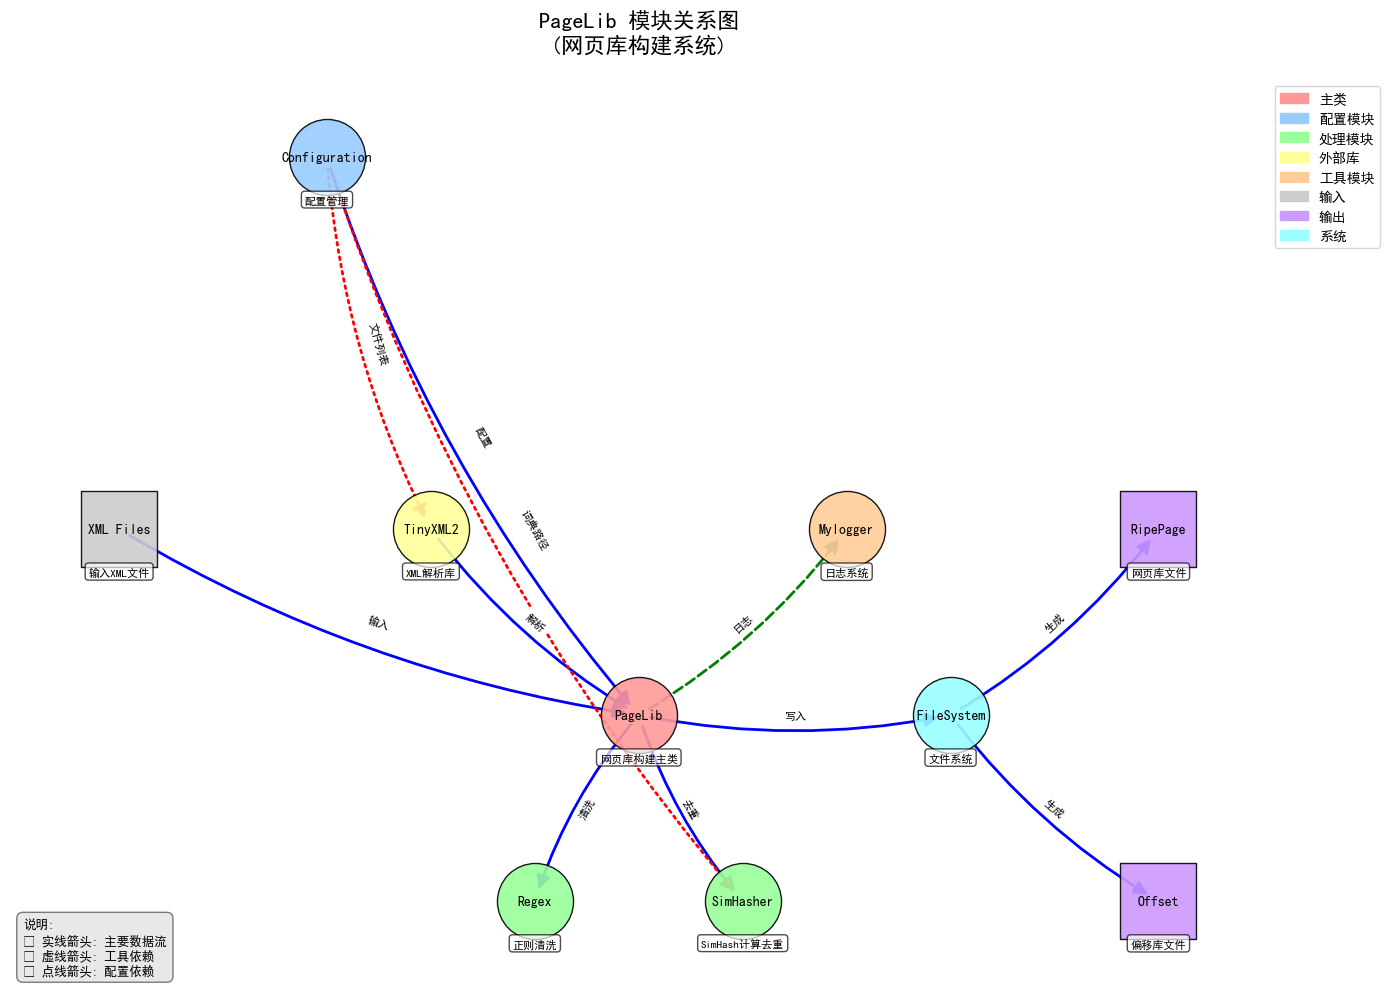


PageLib 处理流程说明:
1. 输入阶段:
   - Configuration 提供XML文件列表
   - 通过 getFileList() 获取所有XML文件路径

2. 解析阶段:
   - 使用 TinyXML2 解析每个XML文件
   - 提取 <item> 中的 title, link, content

3. 清洗阶段:
   - 使用正则表达式去除HTML标签、空白字符等
   - 格式化标题和内容

4. 去重阶段:
   - 使用 SimHasher 计算内容的SimHash
   - 通过哈希值去重，避免重复内容

5. 生成阶段:
   - 格式化文档为特定XML结构
   - 记录每个文档的偏移位置

6. 输出阶段:
   - RipePage: 存储所有网页文档
   - Offset: 存储文档ID、起始位置、长度信息


In [8]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import FancyBboxPatch
import matplotlib.patches as mpatches
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 选择SimHei作为默认的中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
def draw_module_relationship():
    # 创建有向图
    G = nx.DiGraph()
    
    # 添加节点（模块）
    modules = {
        'PageLib': {'type': 'main', 'desc': '网页库构建主类'},
        'Configuration': {'type': 'config', 'desc': '配置管理'},
        'SimHasher': {'type': 'process', 'desc': 'SimHash计算去重'},
        'TinyXML2': {'type': 'external', 'desc': 'XML解析库'},
        'Mylogger': {'type': 'utils', 'desc': '日志系统'},
        'XML Files': {'type': 'input', 'desc': '输入XML文件'},
        'RipePage': {'type': 'output', 'desc': '网页库文件'},
        'Offset': {'type': 'output', 'desc': '偏移库文件'},
        'Regex': {'type': 'process', 'desc': '正则清洗'},
        'FileSystem': {'type': 'system', 'desc': '文件系统'}
    }
    
    for module in modules:
        G.add_node(module, desc=modules[module]['desc'], type=modules[module]['type'])
    
    # 添加边（关系）
    edges = [
        # 数据流
        ('XML Files', 'PageLib', {'label': '输入', 'style': 'solid'}),
        ('Configuration', 'PageLib', {'label': '配置', 'style': 'solid'}),
        ('TinyXML2', 'PageLib', {'label': '解析', 'style': 'solid'}),
        ('PageLib', 'Regex', {'label': '清洗', 'style': 'solid'}),
        ('PageLib', 'SimHasher', {'label': '去重', 'style': 'solid'}),
        ('PageLib', 'FileSystem', {'label': '写入', 'style': 'solid'}),
        ('FileSystem', 'RipePage', {'label': '生成', 'style': 'solid'}),
        ('FileSystem', 'Offset', {'label': '生成', 'style': 'solid'}),
        
        # 工具依赖
        ('PageLib', 'Mylogger', {'label': '日志', 'style': 'dashed'}),
        
        # 配置依赖
        ('Configuration', 'SimHasher', {'label': '词典路径', 'style': 'dotted'}),
        ('Configuration', 'TinyXML2', {'label': '文件列表', 'style': 'dotted'}),
    ]
    
    for edge in edges:
        G.add_edge(edge[0], edge[1], label=edge[2]['label'], style=edge[2]['style'])
    
    # 设置图形布局
    plt.figure(figsize=(14, 10))
    
    # 使用层次布局
    pos = {
        'XML Files': (0, 6),
        'Configuration': (2, 8),
        'PageLib': (5, 5),
        'TinyXML2': (3, 6),
        'Regex': (4, 4),
        'SimHasher': (6, 4),
        'Mylogger': (7, 6),
        'FileSystem': (8, 5),
        'RipePage': (10, 6),
        'Offset': (10, 4)
    }
    
    # 节点颜色映射
    node_colors = {
        'main': '#FF9999',      # 主类 - 红色
        'config': '#99CCFF',    # 配置 - 蓝色
        'process': '#99FF99',   # 处理 - 绿色
        'external': '#FFFF99',  # 外部库 - 黄色
        'utils': '#FFCC99',     # 工具 - 橙色
        'input': '#CCCCCC',     # 输入 - 灰色
        'output': '#CC99FF',    # 输出 - 紫色
        'system': '#99FFFF'     # 系统 - 青色
    }
    
    # 绘制节点
    for node in G.nodes():
        node_type = modules[node]['type']
        nx.draw_networkx_nodes(
            G, pos,
            nodelist=[node],
            node_color=node_colors[node_type],
            node_shape='s' if node_type in ['input', 'output'] else 'o',
            node_size=3000,
            alpha=0.9,
            edgecolors='black'
        )
    
    # 绘制不同样式的边
    solid_edges = [(u, v) for (u, v, d) in G.edges(data=True) if d['style'] == 'solid']
    dashed_edges = [(u, v) for (u, v, d) in G.edges(data=True) if d['style'] == 'dashed']
    dotted_edges = [(u, v) for (u, v, d) in G.edges(data=True) if d['style'] == 'dotted']
    
    nx.draw_networkx_edges(G, pos, edgelist=solid_edges, 
                          edge_color='blue', width=2, style='solid',
                          arrowsize=20, connectionstyle='arc3,rad=0.1')
    
    nx.draw_networkx_edges(G, pos, edgelist=dashed_edges, 
                          edge_color='green', width=2, style='dashed',
                          arrowsize=20, connectionstyle='arc3,rad=0.1')
    
    nx.draw_networkx_edges(G, pos, edgelist=dotted_edges, 
                          edge_color='red', width=2, style='dotted',
                          arrowsize=20, connectionstyle='arc3,rad=0.1')
    
    # 添加节点标签（主标签）
    node_labels = {node: node for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, node_labels, font_size=10, font_weight='bold')
    
    # 添加节点描述（副标签）
    for node, (x, y) in pos.items():
        plt.text(x, y-0.2, modules[node]['desc'], 
                fontsize=8, ha='center', va='top', 
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.7))
    
    # 添加边标签
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)
    
    # 创建图例
    legend_patches = [
        mpatches.Patch(color=node_colors['main'], label='主类'),
        mpatches.Patch(color=node_colors['config'], label='配置模块'),
        mpatches.Patch(color=node_colors['process'], label='处理模块'),
        mpatches.Patch(color=node_colors['external'], label='外部库'),
        mpatches.Patch(color=node_colors['utils'], label='工具模块'),
        mpatches.Patch(color=node_colors['input'], label='输入'),
        mpatches.Patch(color=node_colors['output'], label='输出'),
        mpatches.Patch(color=node_colors['system'], label='系统'),
    ]
    
    plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1, 1))
    
    # 添加标题和说明
    plt.title("PageLib 模块关系图\n(网页库构建系统)", fontsize=16, fontweight='bold', pad=20)
    plt.figtext(0.02, 0.02, 
               "说明:\n"
               "• 实线箭头: 主要数据流\n"
               "• 虚线箭头: 工具依赖\n"
               "• 点线箭头: 配置依赖", 
               fontsize=9, 
               bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.5))
    
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('pagelib_module_relationship.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 输出处理流程说明
    print("\n" + "="*60)
    print("PageLib 处理流程说明:")
    print("="*60)
    print("1. 输入阶段:")
    print("   - Configuration 提供XML文件列表")
    print("   - 通过 getFileList() 获取所有XML文件路径")
    
    print("\n2. 解析阶段:")
    print("   - 使用 TinyXML2 解析每个XML文件")
    print("   - 提取 <item> 中的 title, link, content")
    
    print("\n3. 清洗阶段:")
    print("   - 使用正则表达式去除HTML标签、空白字符等")
    print("   - 格式化标题和内容")
    
    print("\n4. 去重阶段:")
    print("   - 使用 SimHasher 计算内容的SimHash")
    print("   - 通过哈希值去重，避免重复内容")
    
    print("\n5. 生成阶段:")
    print("   - 格式化文档为特定XML结构")
    print("   - 记录每个文档的偏移位置")
    
    print("\n6. 输出阶段:")
    print("   - RipePage: 存储所有网页文档")
    print("   - Offset: 存储文档ID、起始位置、长度信息")
    print("="*60)

# 运行绘图
if __name__ == "__main__":
    draw_module_relationship()